## Title
### Introduction:
    - provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
    - clearly state the question you tried to answer with your project
    - identify and fully describe the dataset that was used to answer the question
    
### Methods & Results:
    - describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
    - your report should include code which:
    - loads data
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis 
    - note: all figures should have a figure number and a legend
    
### Discussion:
    - summarize what you found
    - discuss whether this is what you expected to find?
    - discuss what impact could such findings have?
    - discuss what future questions could this lead to?
#### References
    - You may include references if necessary, as long as they all have a consistent citation style.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [3]:
set.seed(1)

url1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
download.file(url1, destfile = "data/players.csv")
players <- read_csv("data/players.csv")
download.file(url2, destfile = "data/sessions.csv")
sessions <- read_csv("data/sessions.csv")
players
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
# Data Wrangling
# Sessions dataset
# Convert `start_time` and `end_time` to readable datetime
sessions_data <- sessions |>
  mutate(
    start_time = dmy_hm(start_time, tz = "UTC"),
    end_time = dmy_hm(end_time, tz = "UTC"),
  )

# Players dataset
# Only use columns with values
players_data <- players |>
    select(experience:age)
sessions_data
players_data

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


In [5]:
# Combine both datasets
session_counts <- sessions_data |>
    group_by(hashedEmail) |>
    summarize(count = n())

# Join the session counts to players_data based on hashedEmail
set3 <- players_data |>
    left_join(session_counts, by = "hashedEmail")
set3

experience,subscribe,hashedEmail,played_hours,name,gender,age,count
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,1


In [6]:
# Split data
split1 <- initial_split(set3, prop = 0.70, strata = played_hours)
training1 <- training(split1)
testing1 <- testing(split1)

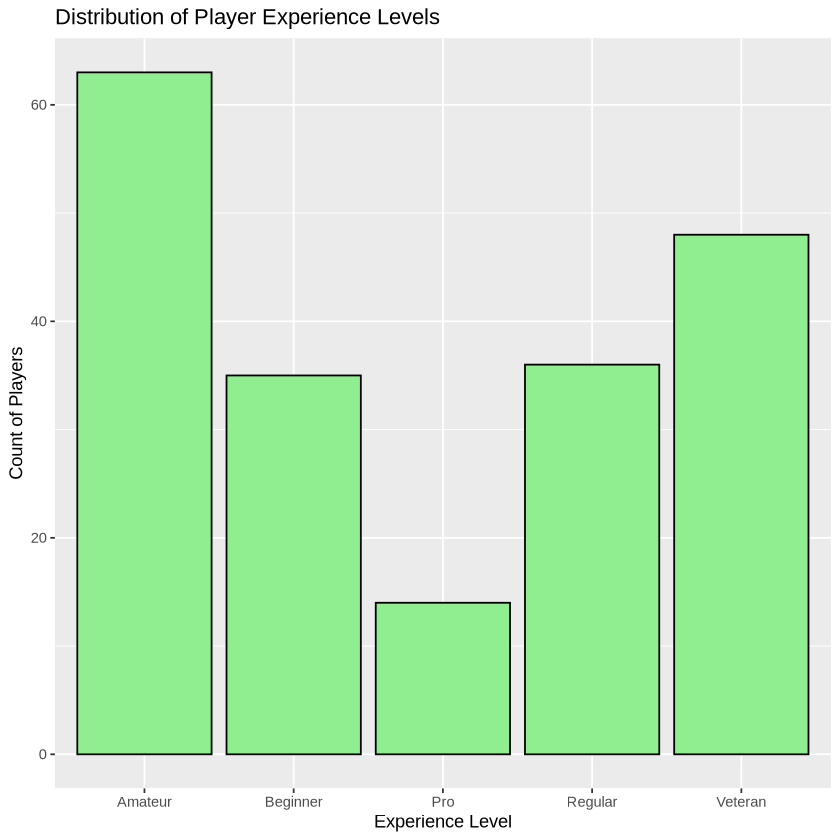

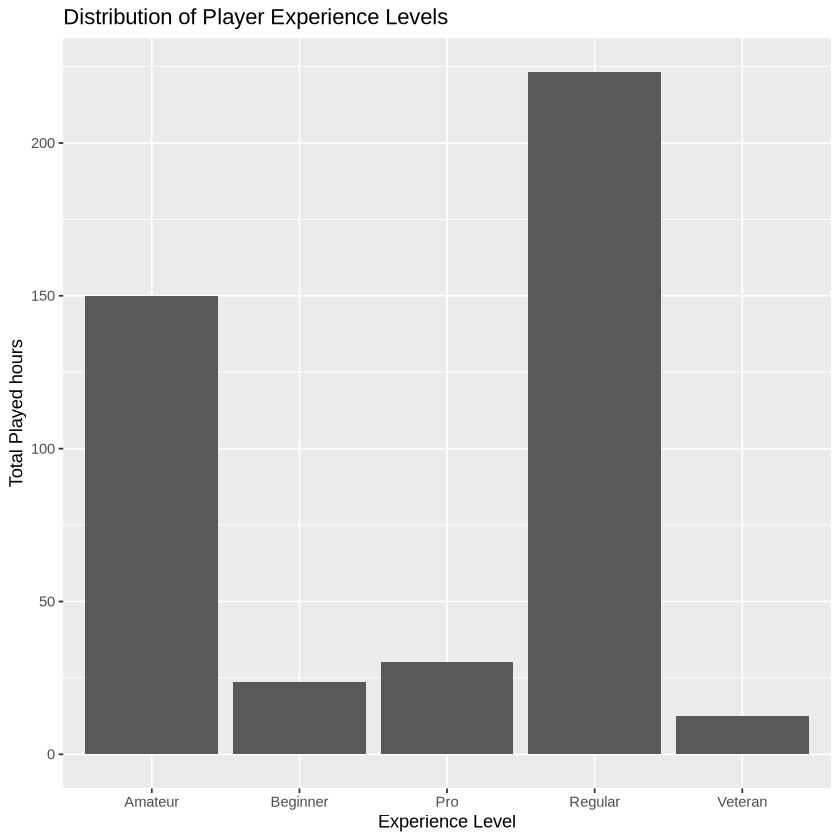

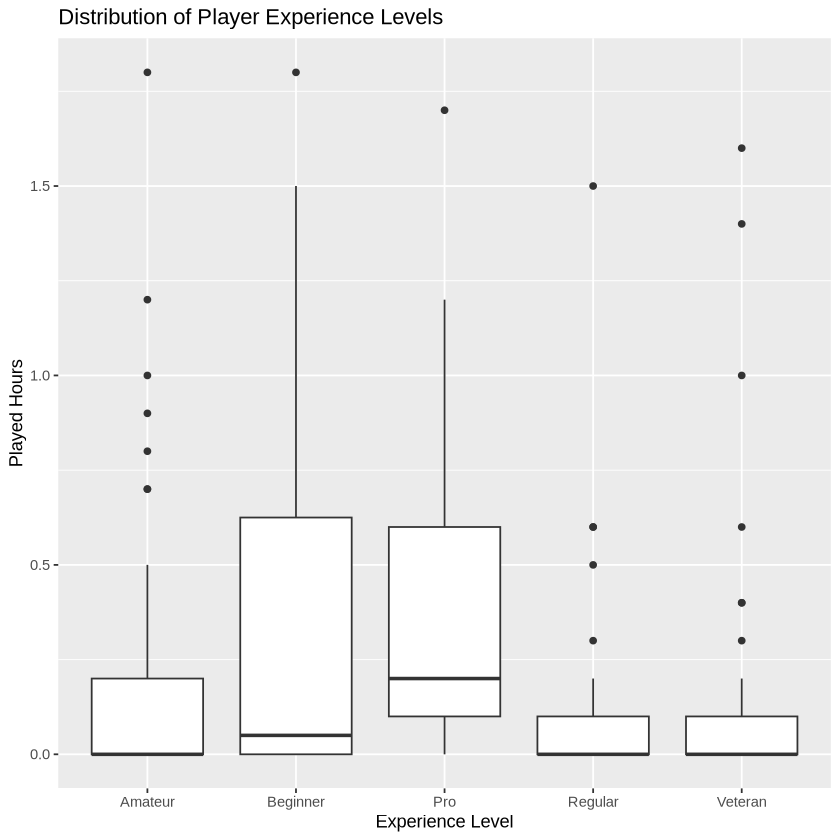

In [7]:
# Played hours vs. Experience
plot1 <- ggplot(set3, aes(x = experience)) +
  geom_bar(fill = "lightgreen", color = "black") +
  labs(
    title = "Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Count of Players"
  )

plot2 <- ggplot(set3, aes(x = experience, y = played_hours)) +
  geom_bar(stat = 'identity', position = "dodge") +
  labs(
    title = "Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Total Played hours"
  )
set4 <- set3|>
    filter(played_hours < 2)
plot3 <- ggplot(set4, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Played Hours"
  )

plot1
plot2
plot3

MODELLING SECTION!

In [8]:
#knn regression set up
#i dunno how to one-hot encode...

# knn_spec <- nearest_neighbour(weight_func = "rectangular", neighbours = tune()) |>
#    set_engine("kknn") |>
#    set_mode("regression")

# knn_recipe <- recipe(played_hours ~ age

Linear Regression Model Specification (regression)

Computational engine: lm 


.pred,experience,subscribe,hashedEmail,played_hours,name,gender,age,count
<dbl>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
1.394495,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
27.017923,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
5.150297,Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3.516883,Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22,79
3.734802,Pro,FALSE,d46bd29a2ed08e3500bd8729085ef4b6f0ca65baf4c756f88b6bedf7a18e0352,1.7,Asher,Male,17,1
5.150297,Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6


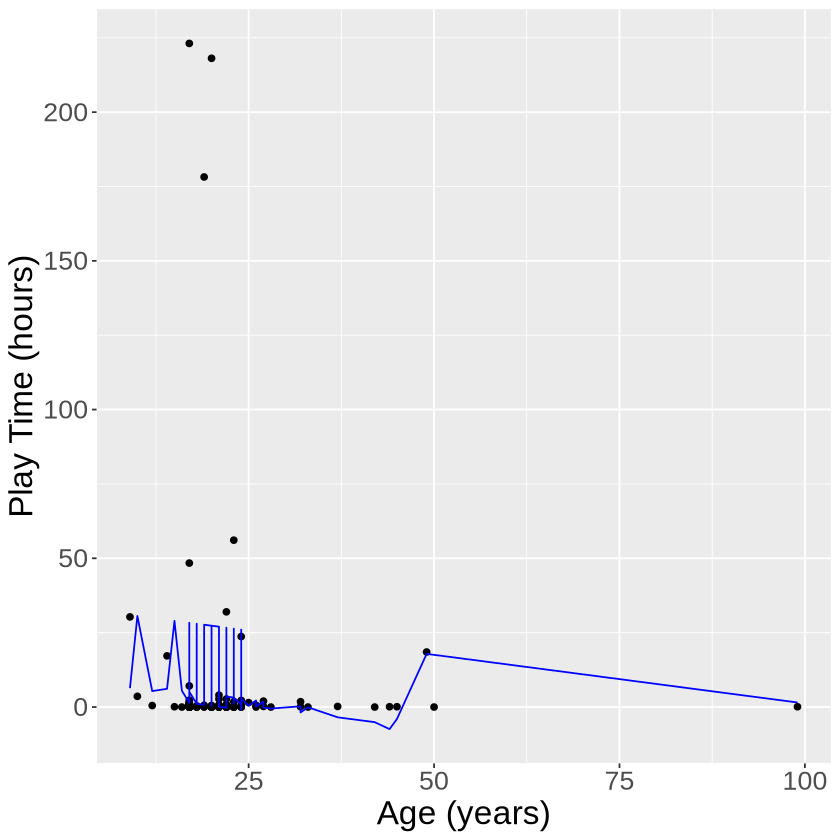

In [11]:
#linear regression!

lin_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lin_spec

lin_recipe <- recipe(played_hours ~ age + experience, data = training1)

lin_fit <- workflow() |>
    add_recipe(lin_recipe) |>
    add_model(lin_spec) |>
    fit(data = training1)

lin_training_test <- lin_fit |>
    predict(training1) |>
    bind_cols(training1)

lin_training_test

lin_training_predictions_age <- lin_training_test |>
    ggplot(aes(x = age, y = played_hours)) +
        geom_point() +
        geom_line(
            mapping = aes(x = age, y = .pred),
            colour = "blue") +
        xlab("Age (years)") +
        ylab("Play Time (hours)") +
        theme(text = element_text(size = 20))

lin_training_predictions_age